# Top 3 NLP Libraries Tutorial( NLTK+spaCy+Gensim)

[https://www.kaggle.com/mjbahmani/top-3-nlp-libraries-tutorial-nltk-spacy-gensim](https://www.kaggle.com/mjbahmani/top-3-nlp-libraries-tutorial-nltk-spacy-gensim)

<br>

<img src="http://s9.picofile.com/file/8351628176/nlp.png"/>

<br>

 <a id="top"></a> <br>
 

# Notebook  Content
1. [Introduction](#1)
    1. [Import](#11)
    1. [Version](#12)
    1. [Setup](#13)
    1. [Data set](#14)
    1. [Gendered Pronoun Analysis](#15)
        1. [Problem Feature](#151)
        1. [Variables](#152)
        1. [Evaluation](#153)
        1. [Check Missing Data](#154)
        1. [Some New Features](#155)
        1. [Visualization](#156)
1. [NLTK](#2)
    1. [Tokenizing sentences](#21)
    1. [NLTK and arrays](#22)
    1. [NLTK stop words](#23)
    1. [NLTK – stemming](#24)
    1. [NLTK speech tagging](#25)
    1. [Natural Language Processing – prediction](#26)
        1. [nlp prediction example](#261)
    1. [nlp prediction example](#27)
1. [spaCy](#3)
    1. [Sentence detection](#31)
    1. [Part Of Speech Tagging](#32)
    1. [spaCy](#33)
    1. [displaCy](#34)
1. [Gensim](#4)
1. [Comparison of Python NLP libraries by Activewizards](#5)
1. [References](#6)

<a id="1"></a> <br>

# 1. Introduction

This Kernel is mostly for **beginners**, and of course, all **professionals** who think they need to review  their  knowledge.
Also, we introduce and teach three known libraries ( NLTK+spaCy+Gensim) for text processing And we will introduce for each of them some examples based on [gendered-pronoun-resolution](https://www.kaggle.com/c/gendered-pronoun-resolution).

<a id="11"></a> <br>

## 1.1 Import

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import gensim
import scipy
import numpy
import json
import nltk
import sys
import csv
import os

<a id="12"></a> <br>

## 1.2 Version

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.1.1
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.25.1
numpy: 1.17.0
Python: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


<a id="13"></a> <br>

## 1.3 Setup

A few tiny adjustments for better **code readability**

In [3]:
sns.set(style="white", context="notebook", palette="deep")
warnings.filterwarnings('ignore')
sns.set_style("white")
%matplotlib inline

<a id="14"></a> <br>

## 1.4 Data Set

In [4]:
print(os.listdir("../../input"))

['sample_submission_stage_1.csv', 'sample_submission_stage_2.csv', 'test_stage_1.tsv', 'test_stage_2.tsv']


In [5]:
gendered_pronoun_df = pd.read_csv('../../input/test_stage_1.tsv', delimiter='\t')

In [6]:
submission = pd.read_csv('../../input/sample_submission_stage_1.csv')

In [7]:
gendered_pronoun_df.shape

(2000, 9)

In [8]:
submission.shape

(2000, 4)

<a id="15"></a> <br>

## 1.5 Gendered Pronoun Data set Analysis

<img src="https://storage.googleapis.com/kaggle-media/competitions/GoogleAI-GenderedPronoun/PronounResolution.png"/>

**Pronoun resolution** is part of coreference resolution(대용어 해소), the task of pairing an expressioni to its referring entity. This is an important task for natural language understanding, and the resolution of ambiguous(애매모호한) pronouns is a longstanding(오랫동안에 걸친) challenge. For more information you can check this [link](https://www.kaggle.com/c/gendered-pronoun-resolution).

<a id="151"></a> <br>

### 1.5.1 Problem Feature

In this competition, you must identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. You are provided with the pronoun and two candidate names to which the pronoun could refer. You must create an algorithm capable of deciding whether the pronoun refers to name A, name B, or neither.

In [9]:
gendered_pronoun_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


In [10]:
gendered_pronoun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
ID                2000 non-null object
Text              2000 non-null object
Pronoun           2000 non-null object
Pronoun-offset    2000 non-null int64
A                 2000 non-null object
A-offset          2000 non-null int64
B                 2000 non-null object
B-offset          2000 non-null int64
URL               2000 non-null object
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


<a id="152"></a> <br>

### 1.5.2 Variables

1. ID - Unique identifier for an example (Matches to Id in output file format)
2. Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length)
3. Pronoun - The target pronoun (text)
4. Pronoun-offset - Thecharacter offset of Pronoun in Text
5. A - The first name candidate (text)
6. A-offset - The character offset of name A in Text
7. B - The second name candidate
8. B-offset - The character offset of name B in Text
9. URL - The URL of the source Wikipedia page for the example

In [11]:
print(gendered_pronoun_df.Text.head())

0    Zoe Telford -- played the police officer girlf...
1    He grew up in Evanston, Illinois the second ol...
2    He had been reelected to Congress, but resigne...
3    The current members of Crime have also perform...
4    Her Santa Fe Opera debut in 2005 was as Nuria ...
Name: Text, dtype: object


<a id="153"></a> <br>

### 1.5.3 Evaluation

Submissions are evaluated using the multi-class logarithmic loss. Each pronoun has been labeled with whether it refers to A, B, or NEITHER. For each pronoun, you must submit a set of predicted probabilites (one for each class). The formula is :

<img src="http://s8.picofile.com/file/8351608076/1.png"/>

In [12]:
print("Shape of train set : ", gendered_pronoun_df.shape)

Shape of train set :  (2000, 9)


In [13]:
gendered_pronoun_df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL'],
      dtype='object')

<a id="154"></a><br>

### 1.5.4 Check Missing Data

In [14]:
def check_missing_data(df) :
    
    flag = df.isna().sum().any()
    
    if flag==True :
        total = df.isnull().sum()
        percent = (df.isnull().sum()) / (df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1,
                           keys=['Total', 'Percent'])
        data_type = []
        
        # written by MJ Bahmani
        for col in df.columns :
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        
        output["Types"] = data_type
        
        return(np.transpose(output))
    
    else :
        
        return(False)

In [15]:
check_missing_data(gendered_pronoun_df)

False

<a id="155"></a> <br>

### 1.5.5 Some New Features

In this section, I will extract a few new statistical features from the text field

<br>

#### 1.5.5.1 Number of words in the text

In [16]:
gendered_pronoun_df["num_words"] = gendered_pronoun_df["Text"].apply(lambda x : len(str(x).split()))

In [17]:
# MJ Bahmani
print("maximum of num_words in data_df", gendered_pronoun_df["num_words"].max())
print("minimum of num_words in data_df", gendered_pronoun_df["num_words"].min())

maximum of num_words in data_df 204
minimum of num_words in data_df 16


<br>

#### 1.5.5.2 Number of unique words in the text

In [19]:
gendered_pronoun_df["num_unique_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(set(str(x).split())))

print("maximum of num_unique_words in train", gendered_pronoun_df["num_unique_words"].max())
print("mean of num_unique_words in data_df", gendered_pronoun_df["num_unique_words"].mean())

maximum of num_unique_words in train 136
mean of num_unique_words in data_df 56.4005


<br>

#### 1.5.5.3 Number of characters in the text

In [20]:
gendered_pronoun_df["num_chars"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x)))

print("maximun of num_chars in data_df", gendered_pronoun_df["num_chars"].max())

maximun of num_chars in data_df 1270


<br>

#### 1.5.5.4 Number of stopwords in the text

In [21]:
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))

In [22]:
gendered_pronoun_df["num_stopwords"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print("maximum of num_stopwords in data_df", gendered_pronoun_df["num_stopwords"].max())

maximum of num_stopwords in data_df 88


<br>

#### 1.5.5.5 Number of punctuaions(구두점) in the text

In [23]:
import string

gendered_pronoun_df["num_punctuations"] = gendered_pronoun_df["Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

print("maximum of num_punctuations in data_df", gendered_pronoun_df["num_punctuations"].max())

maximum of num_punctuations in data_df 93


<br>

#### 1.5.5.6 Number of title case words in the text

In [24]:
gendered_pronoun_df["num_words_upper"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

print("maximum of num_words_upper in data_df", gendered_pronoun_df["num_words_upper"].max())

maximum of num_words_upper in data_df 11


<br>

In [26]:
print(gendered_pronoun_df.columns)
gendered_pronoun_df.head(1)

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL', 'num_words', 'num_unique_words', 'num_chars',
       'num_stopwords', 'num_punctuations', 'num_words_upper'],
      dtype='object')


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0


In [27]:
pronoun = gendered_pronoun_df["Pronoun"]

In [28]:
np.unique(pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [29]:
## is suggested by  https://www.kaggle.com/aavella77
binary = {
    "He": 0,
    "he": 0,
    "She": 1,
    "she": 1,
    "His": 2,
    "his": 2,
    "Him": 3,
    "him": 3,
    "Her": 4,
    "her": 4
}

for index in range(len(gendered_pronoun_df)) :
    key = gendered_pronoun_df.iloc[index]['Pronoun']
    gendered_pronoun_df.at[index, 'Pronoun_binary'] = binary[key]
    
gendered_pronoun_df.head(30)

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0,4.0
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie,65,58,410,22,12,0,2.0
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...,95,71,536,39,16,0,2.0
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band),69,58,401,24,13,1,2.0
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera,112,80,660,43,18,1,1.0
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,DJ,347,http://en.wikipedia.org/wiki/Sandra_Collins,81,64,488,31,13,4,1.0
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,Akiva Eiger,253,http://en.wikipedia.org/wiki/Asher_Arieli,72,48,432,27,11,0,2.0
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,Robert Christgau,377,http://en.wikipedia.org/wiki/The_Truth_About_L...,71,60,451,26,21,0,2.0
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,Kelsey,267,http://en.wikipedia.org/wiki/Mary_S._Peake,53,42,302,23,13,0,4.0
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,Kirstine Stewart,226,http://en.wikipedia.org/wiki/Murdoch_Mysteries,52,45,381,16,14,4,1.0


<a id="156"></a> <br>

### 1.5.6 Visualization

#### 1.5.6.1 WordCloud

In [32]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords

def generate_wordcloud(text) :
    wordcloud = wc(relative_scaling=1.0,
                   stopwords=eng_stopwords).generate(text)
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis('off')
    ax.margins(x=0, y=0)
    plt.show()

In [33]:
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))

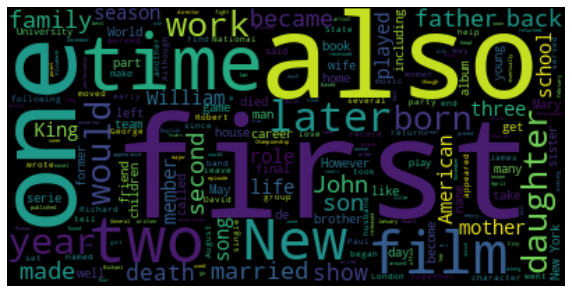

In [35]:
text = " ".join(gendered_pronoun_df.Text)
generate_wordcloud(text)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001179F803710>,
      dtype=object)

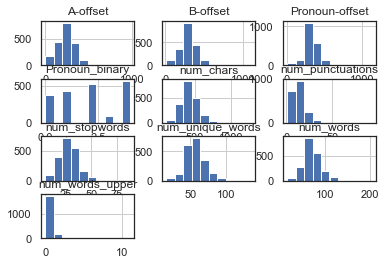

In [36]:
gendered_pronoun_df.hist()

<Figure size 432x288 with 0 Axes>

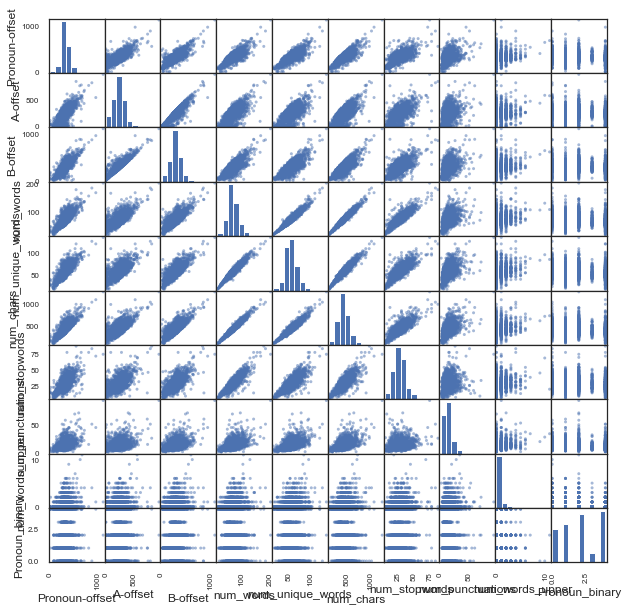

<Figure size 432x288 with 0 Axes>

In [37]:
pd.plotting.scatter_matrix(gendered_pronoun_df, figsize=(10,10))
plt.figure()

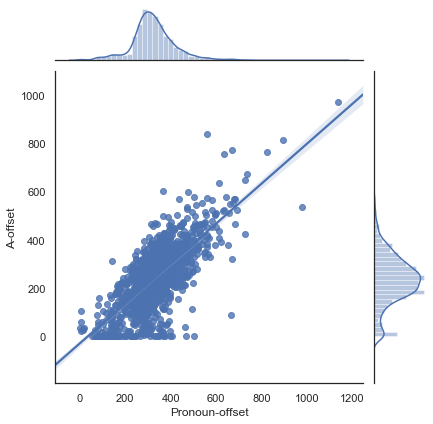

In [38]:
sns.jointplot(x="Pronoun-offset", y="A-offset", data=gendered_pronoun_df, kind="reg")

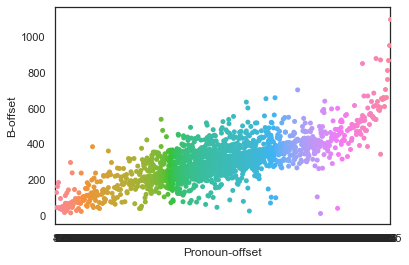

In [39]:
sns.swarmplot(x="Pronoun-offset", y="B-offset", data=gendered_pronoun_df)

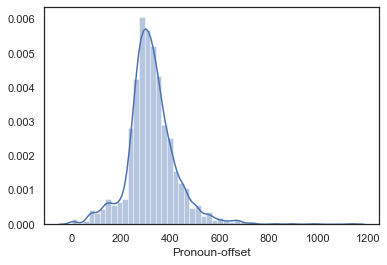

In [40]:
sns.distplot(gendered_pronoun_df["Pronoun-offset"])

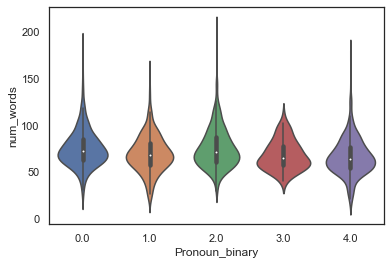

In [41]:
sns.violinplot(data=gendered_pronoun_df, x="Pronoun_binary", y="num_words")

<br>

# Top3 NLP Libraries Tutorial

1. NLTK
2. spaCy
3. Gensim

<a id="2"></a> <br>

# 2. NLTK

The Natural Language Toolkit (NLTK) is one of the leading platforms for working with human language data and Python, the module MLTK is used for natural language processing. NLTK is literally(말 그대로) an acronym(약어) for Natural Language Toolkit. With it you can tokenizing words and sencences.

NLTK is a library of Python that can mine (scrap and upload data) and analyse very large amounts of textual using computational methods. This tutorial is based on **this great course [https://pythonspot.com/category/nltk/](https://pythonspot.com/category/nltk/)**

<img src="https://arts.unimelb.edu.au/__data/assets/image/0005/2735348/nltk.jpg" />

If you using Windows or Linux or Mac, you can install NLTK using pip:

> $ pip install nltk

You can use NLTK on Python 2.7, 3.4 and 3.6

To get started, we first select a few sentenses from the data set.

In [42]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [43]:
gendered_pronoun_df.Text[0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [44]:
our_text = gendered_pronoun_df.Text[0]

In [46]:
print(word_tokenize(our_text))

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


<a id="21"></a> <br>

## 2.1 Tokenizing sentences

**What is Tokenizer?** Tokenizing raw text data is an important pre-processing step for many NLP methods. As explained on wikipedia, tokenization is "the process of breaking a stream of textt up into words, phrases, symbols, or other meaningful elements called tokens." In the context of actually working through an NLP analysis, this usually translates to converting a string like "My favorite color is blue" to a list or array like \["My", "favorite", "color", "is", "blue"\]

In [48]:
from nltk.tokenize import sent_tokenize, word_tokenize

print(sent_tokenize(our_text))

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


<a id="22"></a> <br>

## 2.2 NLTK and Arrays

If you wish to you can store the words and sentences in arrays.

In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize

phrases = sent_tokenize(our_text)
words = word_tokenize(our_text)
print(phrases)

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [50]:
print(words)

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [51]:
type(words)

list

<a id="23"></a> <br>

## 2.3 NLTK Stop Words

Natural language processing (nlp) is a research field that presents many challenges such as natural language understanding. Text may contain stop words like 'the', 'is', 'are'. Stop words can be filtered from the text to be processed. There is no universal list of stop words in nlp research, however the nltk nodule contains a list of stop words.

In this article you will learn how to remove stop words with the nltk module. [https://pythonspot.com/nltk-stop-words/](https://pythonspot.com/nltk-stop-words/)

In [53]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
words = word_tokenize(our_text)
wordsFiltered = []

for w in words :
    if w not in stopWords :
        wordsFiltered.append(w)
        
print(wordsFiltered)

['Zoe', 'Telford', '--', 'played', 'police', 'officer', 'girlfriend', 'Simon', ',', 'Maggie', '.', 'Dumped', 'Simon', 'final', 'episode', 'series', '1', ',', 'slept', 'Jenny', ',', 'seen', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'also', 'year', '11', 'pupil', 'Simon', "'s", 'class', '.', 'Dumped', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'would', "n't", 'sex', 'later', 'realised', 'due', 'catching', 'crabs', 'friend', 'Pauline', '.']


A module has been imported :

In [54]:
from nltk.corpus import stopwords

We get a set of English stop words using the line:

In [55]:
stopWords = set(stopwords.words('english'))

The returned list stopWords contains 153 stop words on my computer. You can view the length or contents of this array with the lines:

In [56]:
print(len(stopWords))
print(stopWords)

179
{"didn't", 'having', 'up', 'off', 'yourselves', 'from', 'i', 'themselves', 'what', "shan't", 'our', 'aren', 'which', 'but', "aren't", 'wasn', 'he', "that'll", "mustn't", 'couldn', 'an', 'just', 'only', 'for', 'your', 'while', 'him', "it's", "should've", 'such', 'here', 'some', 'have', 'isn', "hasn't", 've', 's', 'wouldn', 'their', 'hadn', 'if', 'why', 're', 'on', 'its', 'until', 'during', 'before', 'not', 'weren', 'under', 'against', 'those', 'out', 'don', 'yours', 'they', 'this', 'my', 'hasn', 'being', 'his', 'about', 'these', 'there', 'didn', 'that', 'ain', 'is', 'mustn', 'down', "wasn't", 'then', 'where', 'do', 'all', 'own', 'hers', 'a', 'needn', 'or', 'in', 'nor', 'into', 'been', 'both', 'will', 'did', "needn't", 'after', 'and', "doesn't", 'am', 'itself', 'to', 'each', 'yourself', 'mightn', 'above', 'it', 'further', 'when', 'how', 'ourselves', 'few', 'very', "shouldn't", 'were', 'because', 'shouldn', 'ma', "you'd", "don't", "haven't", "she's", 'once', "won't", 'doing', 'can', '

We create a new list called wordsFiltered which contains all words which are not stop words. To create it we iterate over the list of words and only add it if its not in the stopWords list.

In [57]:
for w in words :
    if w not in stopWords :
        wordFiltered.append(w)

<a id="24"></a> <br>

## 2.4 NLTK - Stemming

Stemming is the process of producing morphological(형태학의) variants(변종) of a root/base word. Stemming programs are commonly referred to as stemmingi algorithms or stemmers. A stemming algorithm reduces the words "chocolates", "chocolatey", "choco" to the root word, "chocolate" and "retrieval", "retrieved", "retrieves" reduce to the stem "retrieve".

[https://www.geeksforgeeks.org/python-stemming-words-with-nltk/](https://www.geeksforgeeks.org/python-stemming-words-with-nltk/)

<img src="https://pythonspot.com/wp-content/uploads/2016/08/word-stem.png.webp" />

Start by defining some words:

In [58]:
our_text = gendered_pronoun_df.Text[0]

In [59]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

And stem the words in the list using:

In [60]:
ps = PorterStemmer()

for word in word_tokenize(our_text) :
    print(ps.stem(word))

zoe
telford
--
play
the
polic
offic
girlfriend
of
simon
,
maggi
.
dump
by
simon
in
the
final
episod
of
seri
1
,
after
he
slept
with
jenni
,
and
is
not
seen
again
.
phoeb
thoma
play
cheryl
cassidi
,
paulin
's
friend
and
also
a
year
11
pupil
in
simon
's
class
.
dump
her
boyfriend
follow
simon
's
advic
after
he
would
n't
have
sex
with
her
but
later
realis
thi
wa
due
to
him
catch
crab
off
her
friend
paulin
.


<a id="25"></a> <br>

## 2.5 NLTK speech tagging

The **module NLTK** can automatically **tag speech**. Given a sentence or paragraph, It can label words such as verbs, nouns and so on.

The example below automatically tags words with a corresponding class.

[https://www.nltk.org/book/ch05.html](https://www.nltk.org/book/ch05.html)

In [61]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer

sentences = nltk.sent_tokenize(our_text)
for sent in sentences :
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Zoe', 'NNP'), ('Telford', 'NNP'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('Simon', 'NNP'), (',', ','), ('Maggie', 'NNP'), ('.', '.')]
[('Dumped', 'VBN'), ('by', 'IN'), ('Simon', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('Jenny', 'NNP'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.')]
[('Phoebe', 'NNP'), ('Thomas', 'NNP'), ('played', 'VBD'), ('Cheryl', 'NNP'), ('Cassidy', 'NNP'), (',', ','), ('Pauline', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('Simon', 'NNP'), ("'s", 'POS'), ('class', 'NN'), ('.', '.')]
[('Dumped', 'NNP'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('Simon', 'N

We can filter this data based on the type of word:

In [63]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

sentences = nltk.sent_tokenize(our_text)

data = []

for sent in sentences :
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
    
for word in data :
    if 'NNP' in word[1] :
        print(word)

('Zoe', 'NNP')
('Telford', 'NNP')
('Simon', 'NNP')
('Maggie', 'NNP')
('Simon', 'NNP')
('Jenny', 'NNP')
('Phoebe', 'NNP')
('Thomas', 'NNP')
('Cheryl', 'NNP')
('Cassidy', 'NNP')
('Pauline', 'NNP')
('Simon', 'NNP')
('Dumped', 'NNP')
('Simon', 'NNP')
('Pauline', 'NNP')
